In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# zip_file_path = '/content/drive/MyDrive/dataset/word2vec_vi_words_300dims.zip'
import zipfile
import os
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors

# extraction_path = '/content/drive/My Drive/word2vec_VN'

# if not os.path.exists(extraction_path):
#     os.makedirs(extraction_path)Ư

word2vec_glove_file = get_tmpfile("/content/drive/MyDrive/dataset/word2vec_vi_words_300dims.txt")

model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
model.save('/content/drive/MyDrive/word2vec')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
import random
import re
import torch
print(model.most_similar('nhà_báo'))
print(model.most_similar('phản_động'))

[('Nhà_báo', 0.789657473564148), ('phóng_viên', 0.7135041952133179), ('Washington_Post_Jamal_Khashoggi', 0.6566924452781677), ('Kosuke_Tsuneoka', 0.6515445709228516), ('Saudi_Arabia_Khashoggi', 0.6459189057350159), ('Arab_Saudi_Khashoggi', 0.64432293176651), ('J._Khashoggi', 0.6441531777381897), ('Anastasia_Baburova', 0.6433132886886597), ('báo_chí', 0.6406913995742798), ('Andrew_Simmons', 0.6366214752197266)]
[('chống_phá', 0.7964444160461426), ('thù_địch', 0.6942732334136963), ('xuyên_tạc', 0.6806550025939941), ('phản_cách_mạng', 0.6742035746574402), ('luận_điệu', 0.6596599221229553), ('kích_động', 0.6521998047828674), ('Việt_Tân', 0.6492446660995483), ('PĐLV', 0.6437748670578003), ('diễn_biến_hoà_bình', 0.6317404508590698), ('dụnginternet', 0.6302641034126282)]


In [ ]:
class Vocab:
    """Vocabulary for text."""
    def __init__(self, tokens=[], min_freq=0, reserved_tokens=[]):
        # Flatten a 2D list if needed
        if tokens and isinstance(tokens[0], list):
            tokens = [token for line in tokens for token in line]
        # Count token frequencies
        counter = collections.Counter(tokens)
        self.token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                  reverse=True)
        # The list of unique tokens
        self.idx_to_token = list(sorted(set(['<unk>'] + reserved_tokens + [
            token for token, freq in self.token_freqs if freq >= min_freq])))
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if hasattr(indices, '__len__') and len(indices) > 1:
            return [self.idx_to_token[int(index)] for index in indices]
        return self.idx_to_token[indices]

    @property
    def unk(self):  # Index for the unknown token
        return self.token_to_idx['<unk>']

def text_analytic(df,show_most_common = False,show_least_common = False,is_plot = False,
                  check_bigram = False,check_trigram = False,check_5gram = False):
    all_comment = ' '.join(df['text'])
    word = all_comment.split()
    print(len(word))
    vocab = Vocab(word)

    print(f'Vocab length is : {len(vocab.token_freqs)}')
    arr = []
    if (show_most_common):
        for i in range (0,min(301,len(vocab.token_freqs))):
            print(f'{i + 1}th most common word is : {vocab.token_freqs[i]}')
            arr.append(vocab.token_freqs[i])

        print('-------------------------------------')

    if (show_least_common):
        for i in range (len(vocab.token_freqs) - 1,len(vocab.token_freqs) - min(101,len(vocab.token_freqs)),-1):
            print(f'{len(vocab.token_freqs) - i}th least common word is : {vocab.token_freqs[i]}')

    if (is_plot):
        x = np.arange(0,1000,1)
        y = np.array(vocab.token_freqs[:1000])
        y = y[:,1].astype(int)
        plt.title('Word distribution among comment')
        plt.xlabel('Word')
        plt.ylabel('Frequency')
        plt.plot(x,y)

    if (check_bigram):
        bigram_tokens = ['--'.join(pair) for pair in zip(word[:-1], word[1:])]
        bigram_vocab = Vocab(bigram_tokens)
        for i in range (0,300):
            print(f'{i + 1}th most common bigrams is : {bigram_vocab.token_freqs[i]}')

        print('-------------------------------------')

    if (check_trigram):
        trigram_tokens = ['--'.join(triple) for triple in zip(
        word[:-2], word[1:-1], word[2:])]
        trigram_vocab = Vocab(trigram_tokens)
        for i in range (0,300):
            print(f'{i + 1}th most common trigrams is : {trigram_vocab.token_freqs[i]}')

        print('-------------------------------------')

    if (check_5gram):
        trigram_tokens = ['--'.join(penta) for penta in zip(
        word[:-4], word[1:-3], word[2:-2], word[3:-1], word[4:])]
        trigram_vocab = Vocab(trigram_tokens)
        for i in range (0,300):
            print(f'{i + 1}th most common 5grams is : {trigram_vocab.token_freqs[i]}')

        print('-------------------------------------')
    return arr

In [ ]:
def concat(text):
  return ' '.join(text)
df = pd.read_csv('/content/drive/MyDrive/dataset/fixed_data.csv')
print(df.columns)
print(df.shape)
print(df['text'])


NameError: name 'pd' is not defined

In [ ]:
print(df['label'].dtypes)
df['label'].replace(2, 0, inplace=True)
df_rise = df[df['label'] == 1]
df_non_rise = df[df['label'] == 0]
print(len(df_rise),len(df_non_rise) )
print(len(df[df['label'] == 2]))
n_samples = 30

def freq_word(data):
  x = []
  y = []
  for item in data:
    x.append(item[0])
    y.append(item[1])
  df = pd.DataFrame({'Từ': x, 'Tần suất': y})
  # print(df)
  plt.figure(figsize=(18,8))
  plt.title('30 từ xuất hiện nhiều nhất trong dữ liệu phản động')
  plt.xlabel('Từ')
  plt.ylabel('Tần suất')
  #sns.barplot(top_words, x='Words', y='Frequence', color='purple')
  ax = sns.barplot(x=y, y=x)
  ax.bar_label(ax.containers[0], fontsize=10);


(599, 10)
229265
Vocab length is : 11949
1th most common word is : ('và', 4032)
2th most common word is : ('của', 3968)
3th most common word is : ('là', 3946)
4th most common word is : ('không', 2802)
5th most common word is : ('có', 2593)
6th most common word is : ('người', 2518)
7th most common word is : ('cho', 2252)
8th most common word is : ('một', 2143)
9th most common word is : ('các', 2133)
10th most common word is : ('được', 2019)
11th most common word is : ('đã', 1947)
12th most common word is : ('những', 1927)
13th most common word is : ('trong', 1903)
14th most common word is : ('để', 1850)
15th most common word is : ('thì', 1736)
16th most common word is : ('việt_nam', 1535)
17th most common word is : ('với', 1411)
18th most common word is : ('về', 1346)
19th most common word is : ('đó', 1345)
20th most common word is : ('ông', 1343)
21th most common word is : ('ra', 1337)
22th most common word is : ('này', 1328)
23th most common word is : ('bị', 1281)
24th most common wor

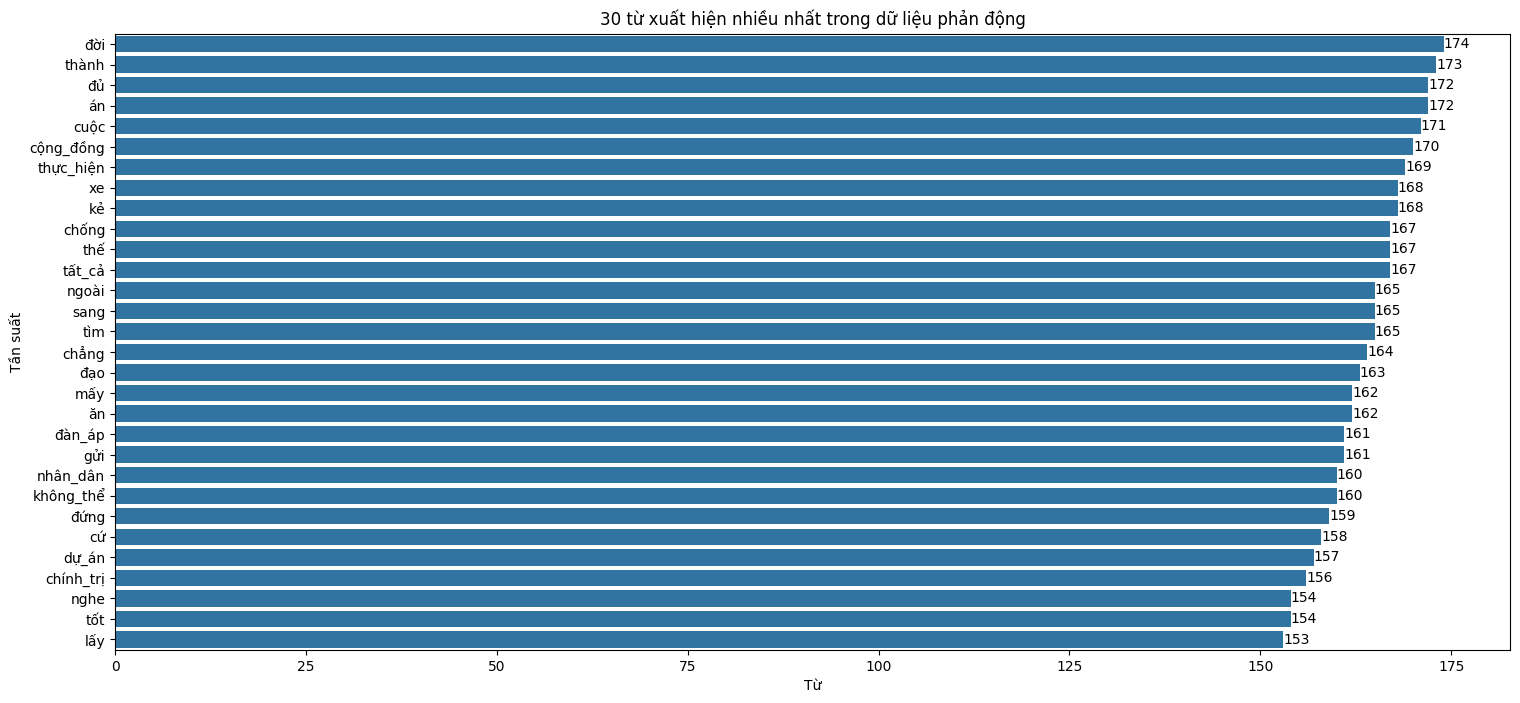

In [ ]:
print(df_rise.shape)
import matplotlib.pyplot as plt
import seaborn as sns
arr = text_analytic(df_rise, True, True)
n_sample = 30
freq_word(arr[200:200+n_sample])

In [ ]:
print(df_non_rise.shape)

arr = text_analytic(df_non_rise, True, True)
freq_gen(arr, 20)

(3171, 10)
652829
Vocab length is : 22588
1th most common word is : ('của', 9883)
2th most common word is : ('và', 9227)
3th most common word is : ('là', 8808)
4th most common word is : ('có', 7086)
5th most common word is : ('không', 6185)
6th most common word is : ('đã', 6140)
7th most common word is : ('trong', 6103)
8th most common word is : ('được', 6061)
9th most common word is : ('người', 5912)
10th most common word is : ('các', 5911)
11th most common word is : ('cho', 5825)
12th most common word is : ('một', 5739)
13th most common word is : ('để', 4828)
14th most common word is : ('với', 4662)
15th most common word is : ('thì', 4624)
16th most common word is : ('những', 4186)
17th most common word is : ('ở', 3837)
18th most common word is : ('này', 3541)
19th most common word is : ('khi', 3530)
20th most common word is : ('về', 3521)
21th most common word is : ('đó', 3495)
22th most common word is : ('ra', 3330)
23th most common word is : ('cũng', 3249)
24th most common word is

TypeError: Column 'Frequence' has dtype object, cannot use method 'nlargest' with this dtype

In [ ]:
most_common_words = text_analytic(df, True, True)
# freq_gen(most_common_words, 20)

882094
Vocab length is : 25052
1th most common word is : ('của', 13851)
2th most common word is : ('và', 13259)
3th most common word is : ('là', 12754)
4th most common word is : ('có', 9679)
5th most common word is : ('không', 8987)
6th most common word is : ('người', 8430)
7th most common word is : ('đã', 8087)
8th most common word is : ('được', 8080)
9th most common word is : ('cho', 8077)
10th most common word is : ('các', 8044)
11th most common word is : ('trong', 8006)
12th most common word is : ('một', 7882)
13th most common word is : ('để', 6678)
14th most common word is : ('thì', 6360)
15th most common word is : ('những', 6113)
16th most common word is : ('với', 6073)
17th most common word is : ('ở', 5094)
18th most common word is : ('này', 4869)
19th most common word is : ('về', 4867)
20th most common word is : ('đó', 4840)
21th most common word is : ('ra', 4667)
22th most common word is : ('khi', 4572)
23th most common word is : ('ông', 4379)
24th most common word is : ('cũng

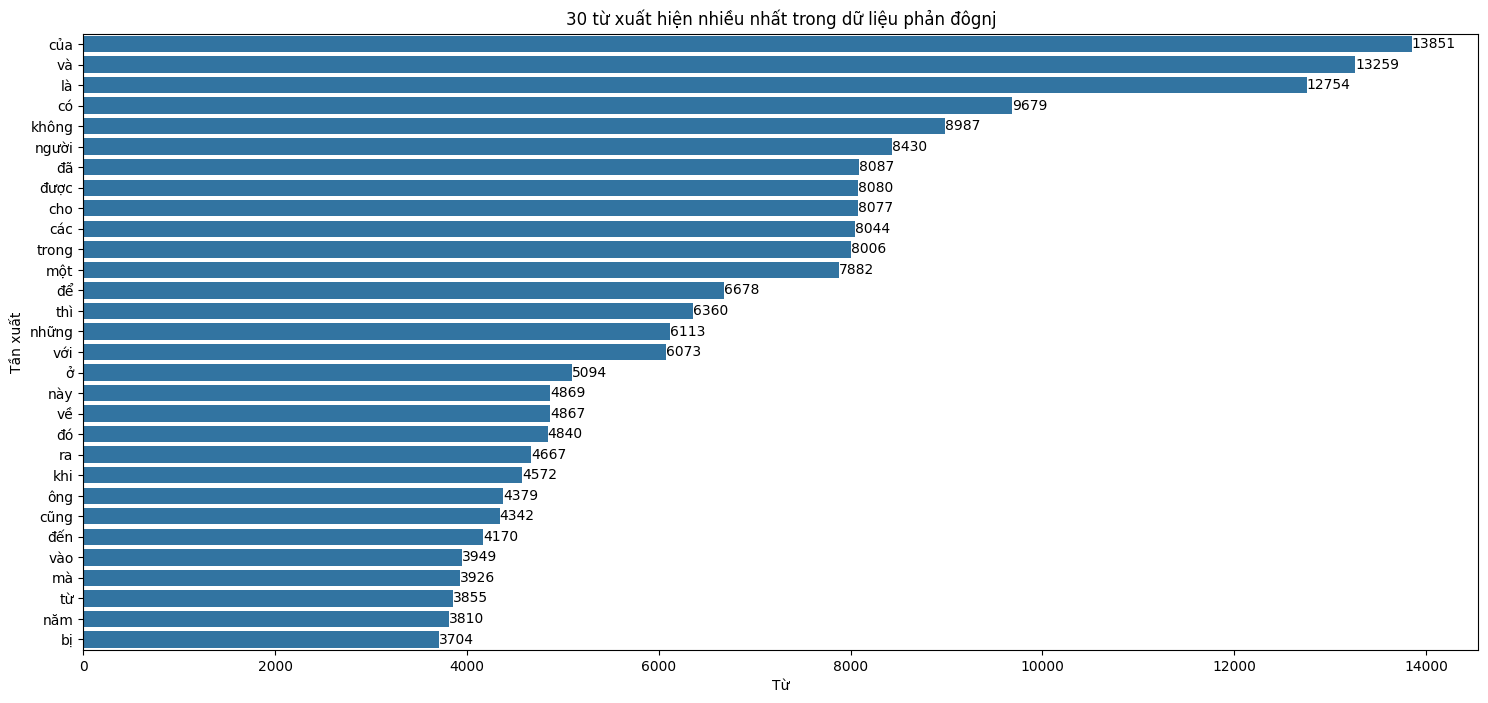

In [ ]:
n_samples = 30

def freq_word(data):
  x = []
  y = []
  for item in data:
    x.append(item[0])
    y.append(item[1])
  df = pd.DataFrame({'Từ': x, 'Tần suất': y})
  # print(df)
  plt.figure(figsize=(18,8))
  plt.title('30 từ xuất hiện nhiều nhất trong dữ liệu phản động')
  plt.xlabel('Từ')
  plt.ylabel('Tần xuất')
  #sns.barplot(top_words, x='Words', y='Frequence', color='purple')
  ax = sns.barplot(x=y, y=x)
  ax.bar_label(ax.containers[0], fontsize=10);

freq_word(most_common_words[:n_samples])

In [ ]:
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import ast
vector = model.get_vector('#')
print(vector)
# print(model.get_vector('nhà_báo'))
# print(model.get_vector('phản_động'))

[ 1.18103281e-01 -3.10608875e-02  1.88861799e-03 -1.52416746e-04
 -1.22892410e-02  4.44349982e-02 -8.35676715e-02  5.54835536e-02
  4.63955328e-02  1.68323349e-02  3.37382816e-02 -3.46901390e-04
 -6.32836893e-02 -3.27585861e-02  5.45702763e-02  5.54477051e-02
  4.19518463e-02 -9.11059603e-02  1.08048454e-01  5.19364327e-02
  3.79296057e-02 -8.24142098e-02  3.93282324e-02  5.77415489e-02
 -1.15892723e-01 -5.04925847e-02 -6.83692619e-02 -3.15384977e-02
  5.98643310e-02  6.72435239e-02 -6.71091229e-02  1.04968222e-02
 -3.75020355e-02 -9.94102061e-02 -5.09660132e-02 -1.04419775e-01
 -3.25149819e-02  6.53793663e-02  6.30559623e-02  1.16378125e-02
  7.85366260e-03 -9.76438150e-02  5.82721159e-02 -6.38569891e-02
 -7.22795650e-02  2.84999050e-02  2.52906401e-02 -1.63581111e-02
  8.00263807e-02  3.94914337e-02 -4.79156561e-02  2.67782509e-02
  9.70256627e-02 -1.17870063e-01  1.11031746e-02  2.71987226e-02
 -1.96310524e-02  5.65690920e-02  2.17254255e-05 -2.24416610e-02
  3.27506545e-03 -3.78212

In [ ]:
import ast

string_list = "[1, 2, 3]"
actual_list = ast.literal_eval(string_list)
print(actual_list)


[1, 2, 3]


In [ ]:
def embedding_300(text):
  text = ast.literal_eval(text)
  n_size = len(text)
  n_feature = 300
  embed = []
  if n_size <= n_feature:
    for x in text:
      cur = np.zeros(n_feature)
      if model.has_index_for(x):
        cur = model.get_vector(x)
      embed.append(cur)
    for _ in range(n_feature-n_size):
      embed.append(model.get_vector('#'))
  else:
    for x in text[:(n_feature-100)//2]:
      cur = np.zeros(n_feature)
      if model.has_index_for(x):
        cur = model.get_vector(x)
      embed.append(cur)
    s = (n_feature-100)//2 + (n_size-n_feature)//2
    for x in text[s:s+100]:
      cur = np.zeros(n_feature)
      if model.has_index_for(x):
        cur = model.get_vector(x)
      embed.append(cur)
    for x in text[-(n_feature-100)//2:]:
      cur = np.zeros(n_feature)
      if model.has_index_for(x):
        cur = model.get_vector(x)
      embed.append(cur)
  arr = np.concatenate(embed)
  # print(len(embed), arr.shape)
  return arr
df['embedding'] = df['text_split'].apply(embedding_300)

In [ ]:
list_of_lists = df['embedding'].tolist()
transposed_list = list(map(list, zip(*list_of_lists)))


In [ ]:
# df['embedding'] = df['text_split'].apply(embedding_300)
save_df = pd.DataFrame(transposed_list)

save_df['label'] = df['label']
print(save_df.shape)
print(save_df.info())
print(save_df.describe)
save_df.to_csv('/content/drive/MyDrive/dataset/embedding_300.csv', index=False)

In [ ]:
def embedding_500(text):
  text = ast.literal_eval(text)
  # print(type(text))
  n_size = len(text)
  n_feature = 500
  embed = []
  if n_size <= n_feature:
    for x in text:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)
    for _ in range(n_feature-n_size):
      embed.append(model.get_vector('#'))
  else:
    for x in text[:(n_feature-100)//2]:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)
    s = (n_feature-100)//2 + (n_size-n_feature)//2
    for x in text[s:s+100]:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)
    for x in text[-(n_feature-100)//2:]:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)
  # print(n_size, len(embed))
  arr = np.concatenate(embed)
  if len(arr) != 150000:
    print(i)
  return arr
df['embedding'] = df['text_split'].apply(embedding_500)
save_df = pd.DataFrame(df['embedding'].tolist())
save_df['label'] = df['label']
save_df.to_csv('/content/drive/MyDrive/dataset/embedding_500.csv', index=False)

In [ ]:
def convert_dataloader(df, name, embedding_fn):
  df['embedding'] = df['text_split'].apply(embedding_fn)
  data_train, data_test, label_train, label_test = train_test_split(df, df['label'], test_size=0.2)
  tensor_x = torch.Tensor(data_train['embedding'].tolist())
  tensor_y = torch.Tensor(data_train['label'].tolist())
  my_dataset = TensorDataset(tensor_x,tensor_y)
  my_dataloader = DataLoader(my_dataset, batch_size=8)
  # print(my_dataloader.shape)
  joblib.dump(my_dataloader, f'/content/drive/MyDrive/trainloader_{name}')
  tensor_x = torch.Tensor(data_test['embedding'].tolist())
  tensor_y = torch.Tensor(data_test['label'].tolist())
  my_dataset = TensorDataset(tensor_x,tensor_y)
  my_dataloader = DataLoader(my_dataset, batch_size=8)
  # print(my_dataloader.shape)
  print(label_test.sum()/len(label_test))
  print(label_train.sum()/len(label_train))
  joblib.dump(my_dataloader, f'/content/drive/MyDrive/testloader_{name}')
# convert_dataloader(df, '300', embedding_300)
dropped_words = most_common_words[:50]
for x in most_common_words[50:]:
  if len(x) <= 1:
    dropped_words.append(x)
def drop_embedding_300(text):
  text = ast.literal_eval(text)
  text = [x for x in text if x not in dropped_words]
  n_size = len(text)
  n_feature = 300
  embed = []
  if n_size <= n_feature:
    for x in text:
      cur = np.zeros(n_feature)
      if model.has_index_for(x):
        cur = model.get_vector(x)
      embed.append(cur)
    for _ in range(n_feature-n_size):
      embed.append(model.get_vector('#'))
  else:
    for x in text[:(n_feature-100)//2]:
      cur = np.zeros(n_feature)
      if model.has_index_for(x):
        cur = model.get_vector(x)
      embed.append(cur)
    s = (n_feature-100)//2 + (n_size-n_feature)//2
    for x in text[s:s+100]:
      cur = np.zeros(n_feature)
      if model.has_index_for(x):
        cur = model.get_vector(x)
      embed.append(cur)
    for x in text[-(n_feature-100)//2:]:
      cur = np.zeros(n_feature)
      if model.has_index_for(x):
        cur = model.get_vector(x)
      embed.append(cur)
  return np.array(embed)
# convert_dataloader(df, '300_drop', drop_embedding_300)

In [ ]:
# convert_dataloader(df, '300_drop', drop_embedding_300)
def drop_embedding_500(text):
  text = ast.literal_eval(text)
  text = [x for x in text if x not in dropped_words]
  # print(type(text))
  n_size = len(text)
  n_feature = 500
  embed = []
  if n_size <= n_feature:
    for x in text:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)
    for _ in range(n_feature-n_size):
      embed.append(model.get_vector('#'))
  else:
    for x in text[:(n_feature-100)//2]:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)
    s = (n_feature-100)//2 + (n_size-n_feature)//2
    for x in text[s:s+100]:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)
    for x in text[-(n_feature-100)//2:]:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)

  return np.array(embed)
convert_dataloader(df, '500_drop', drop_embedding_500)

<ipython-input-9-0a74bf744e9a>:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  tensor_x = torch.Tensor(data_train['embedding'].tolist())


0.1419098143236074
0.16312997347480107


In [ ]:
for i in range(len(save_df)):
  if len(save_df['embedding'][i]) != 300*500:
    print(i)

In [ ]:
def drop_embedding_500(text):
  text = ast.literal_eval(text)
  text = [x for x in text if x not in dropped_words]
  # print(type(text))
  n_size = len(text)
  n_feature = 500
  embed = []
  if n_size <= n_feature:
    for x in text:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)
    for _ in range(n_feature-n_size):
      embed.append(model.get_vector('#'))
  else:
    for x in text[:(n_feature-100)//2]:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)
    s = (n_feature-100)//2 + (n_size-n_feature)//2
    for x in text[s:s+100]:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)
    for x in text[-(n_feature-100)//2:]:
      cur = np.zeros(300)
      if model.has_index_for(x):
        cur = model.get_vector(x)
        if len(cur) != 300:
          print(x)
          return False
      embed.append(cur)

  arr = np.concatenate(embed)
  if len(arr) != 300*500:
    print(n_size, len(arr))
  return arr
convert_dataloader(df, '500_drop', drop_embedding_500)